### Perceptron Ilham Khefi Ramadhanu - 2213020120

## Read Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataikan = pd.read_csv('Dataset Supervised/fish_data.csv')
dataikan

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [3]:
dataikan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [4]:
dataikan.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [5]:
dataikan.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


## Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
dataikan['species'] = labenc.fit_transform(dataikan['species'])
dataikan

,species,length,weight,w_l_ratio
0,0,10.66,3.45,0.32
1,0,6.91,3.27,0.47
2,0,8.38,3.46,0.41
3,0,7.57,3.36,0.44
4,0,10.83,3.38,0.31
...,...,...,...,...
4075,8,30.56,6.12,0.20
4076,8,29.66,6.11,0.21
4077,8,32.81,6.25,0.19
4078,8,29.78,6.11,0.21


In [7]:
dataikan.corr()

,species,length,weight,w_l_ratio
species,1.000000,0.342145,0.475682,-0.181628
length,0.342145,1.000000,0.411584,-0.738174
weight,0.475682,0.411584,1.000000,0.245835
w_l_ratio,-0.181628,-0.738174,0.245835,1.000000


## Independent Dependent Variable

In [8]:
X = dataikan.drop(columns='species')
X

,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31
...,...,...,...
4075,30.56,6.12,0.20
4076,29.66,6.11,0.21
4077,32.81,6.25,0.19
4078,29.78,6.11,0.21


In [9]:
y = dataikan['species']
y

0       0
1       0
2       0
3       0
4       0
       ..
4075    8
4076    8
4077    8
4078    8
4079    8
Name: species, Length: 4080, dtype: int32

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.9409222 , -0.27866241,  0.54635083],
       [-1.46806569, -0.45169987,  1.76555488],
       [-1.26142544, -0.26904922,  1.27787326],
       ...,
       [ 2.17273871,  2.41303142, -0.51029267],
       [ 1.74680677,  2.27844673, -0.34773214],
       [ 2.00545851,  2.3072863 , -0.51029267]])

## Split Test Train

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
len(dataikan)

4080

In [13]:
len(X_train)

3264

In [14]:
len(X_test)

816

## Training

In [15]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=500, tol=0.01, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(max_iter=500, random_state=42, tol=0.01)

## Testing

In [16]:
y_pred = perceptron.predict(X_test)
y_pred

array([0, 2, 7, 5, 0, 3, 2, 8, 8, 3, 8, 1, 3, 2, 2, 1, 4, 1, 4, 1, 3, 2,
       3, 5, 0, 2, 8, 0, 2, 8, 5, 8, 4, 2, 4, 3, 5, 5, 3, 3, 0, 4, 2, 7,
       2, 2, 4, 4, 5, 0, 0, 2, 0, 7, 2, 8, 4, 2, 1, 2, 2, 8, 0, 2, 2, 4,
       0, 2, 2, 5, 8, 2, 0, 2, 1, 2, 5, 2, 8, 6, 4, 2, 2, 2, 2, 2, 8, 4,
       4, 3, 2, 2, 2, 2, 3, 2, 8, 0, 0, 0, 2, 1, 1, 6, 0, 8, 1, 2, 4, 0,
       0, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0, 0, 3, 2, 2, 2, 6, 2, 5, 5, 0, 8,
       1, 2, 4, 4, 8, 3, 5, 2, 2, 4, 2, 6, 5, 2, 0, 3, 3, 5, 4, 4, 5, 5,
       3, 6, 4, 1, 1, 7, 2, 1, 0, 2, 2, 8, 2, 2, 5, 0, 8, 0, 5, 4, 2, 0,
       6, 6, 8, 0, 0, 2, 0, 4, 2, 5, 1, 2, 1, 2, 3, 3, 2, 5, 2, 3, 8, 1,
       0, 4, 5, 0, 8, 1, 8, 3, 7, 4, 3, 5, 2, 3, 4, 1, 2, 3, 2, 5, 2, 0,
       5, 2, 3, 5, 4, 1, 2, 2, 0, 8, 3, 5, 2, 2, 1, 2, 2, 3, 4, 3, 2, 2,
       4, 4, 2, 8, 0, 2, 2, 4, 8, 6, 4, 0, 2, 5, 7, 5, 2, 4, 0, 0, 3, 6,
       4, 2, 6, 8, 2, 8, 2, 1, 0, 2, 8, 5, 3, 3, 0, 5, 4, 0, 1, 2, 8, 0,
       8, 2, 0, 0, 2, 2, 1, 5, 2, 5, 2, 4, 7, 5, 2,

## Model Evaluation

In [17]:
perceptron.score(X_test, y_test)

0.7892156862745098

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi Perceptron : {:.2f}%".format(acc*100))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       120
           1       1.00      0.99      0.99        77
           2       0.39      1.00      0.56        91
           3       1.00      0.83      0.90        86
           4       0.98      0.94      0.96        89
           5       0.95      0.95      0.95       102
           6       1.00      0.29      0.45        65
           7       0.00      0.00      0.00       100
           8       1.00      1.00      1.00        86

    accuracy                           0.79       816
   macro avg       0.81      0.78      0.76       816
weighted avg       0.79      0.79      0.76       816

Akurasi Perceptron : 78.92%


In [19]:
confusion_matrix(y_test, y_pred)

array([[120,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  76,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,  91,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  71,   0,   0,   0,  15,   0],
       [  0,   0,   0,   0,  84,   5,   0,   0,   0],
       [  3,   0,   0,   0,   2,  97,   0,   0,   0],
       [  2,   0,  44,   0,   0,   0,  19,   0,   0],
       [  0,   0, 100,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  86]], dtype=int64)

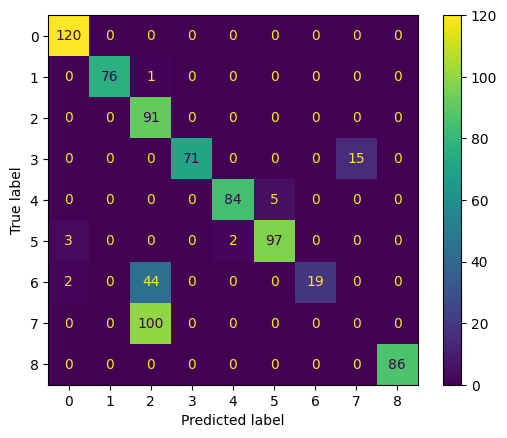

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Test New Data

In [21]:
new_data = {											
    'length' : [27.9],
    'weight' : [5.66],
    'w_l_ratio' : [0.21],	
}

new_data = pd.DataFrame(new_data)
new_data

,length,weight,w_l_ratio
0,27.9,5.66,0.21


In [22]:
scaled_new_data = scaler.fit_transform(new_data)
new_prediction = perceptron.predict(new_data)

decoded_label = labenc.inverse_transform([new_prediction[0]])
hasil = decoded_label[0]
print('Hasil Prediksi = {}'.format(hasil))

Hasil Prediksi = Coilia dussumieri


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


In [23]:
for i in range(len(y.unique())):
    decoded_label = labenc.inverse_transform([i])
    print("{} = {}".format(i, decoded_label[0]))

0 = Anabas testudineus
1 = Coilia dussumieri
2 = Otolithoides biauritus
3 = Otolithoides pama
4 = Pethia conchonius
5 = Polynemus paradiseus
6 = Puntius lateristriga
7 = Setipinna taty
8 = Sillaginopsis panijus


# ======================================================================================================================================

## Export Model

In [24]:
import pickle
with open('Model/perceptron_fish.pickle', 'wb') as r:
    pickle.dump(perceptron, r)